<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [3]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



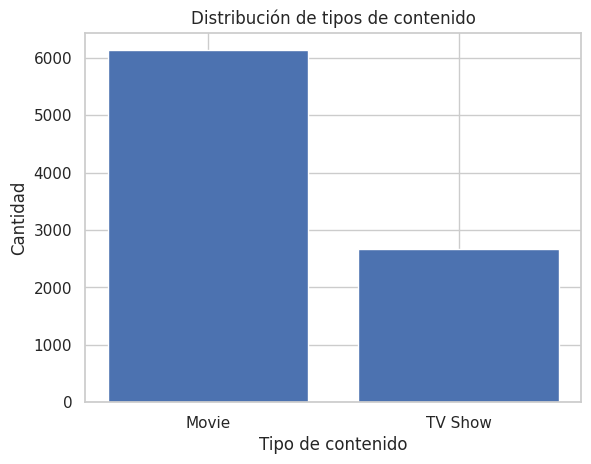

In [4]:
peliculas = df['type'].value_counts()
plt.bar(peliculas.index, peliculas.values)
plt.xlabel('Tipo de contenido')
plt.ylabel('Cantidad')
plt.title('Distribución de tipos de contenido')
plt.show()

In [5]:
#El contenido predominante son las peliculas, esto puede ser relevante para el usuario segun lom que busque

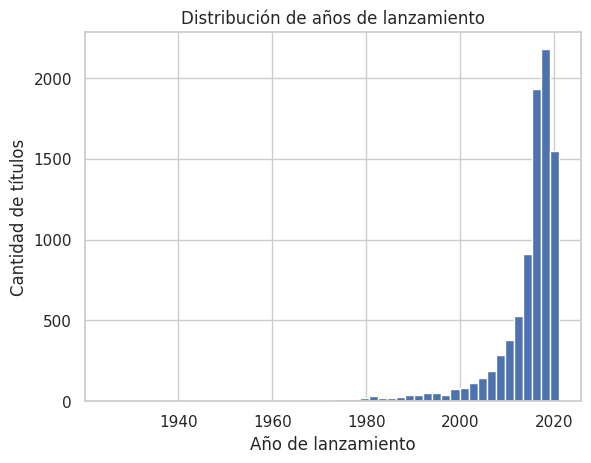

In [6]:
plt.hist(df['release_year'], bins=50)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de títulos')
plt.title('Distribución de años de lanzamiento')
plt.show()

In [7]:
#Hay muchisimo contenido mas reciente que antiguo, se puede ver una tendencia al alza entre los años 2000 y 2020, especialmente desde 2010 en adelante que es donde estuvo el boom del internet y las plataformas de streaming

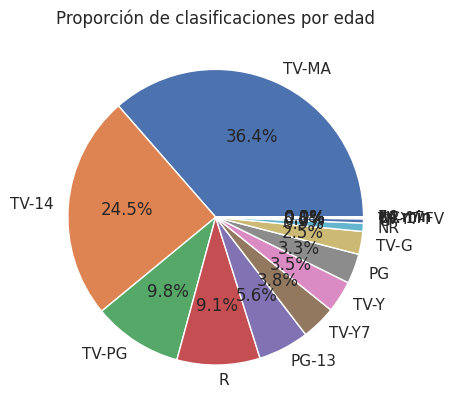

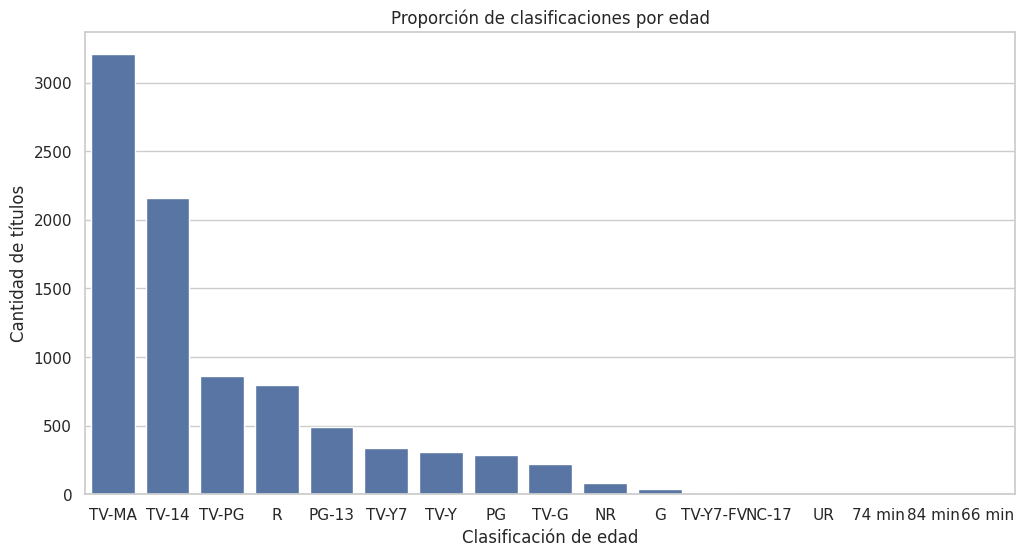

In [8]:
categorias = df['rating'].value_counts()

plt.pie(categorias.values, labels=categorias.index, autopct='%2.1f%%')
plt.title('Proporción de clasificaciones por edad')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=categorias.index, y=categorias.values)
plt.xlabel('Clasificación de edad')
plt.ylabel('Cantidad de títulos')
plt.title('Proporción de clasificaciones por edad')
plt.show()

In [9]:
#LA categoria mas comun es TV_MA y no se para que publico esta mas enfocado porque no se que es cada categoria XD



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


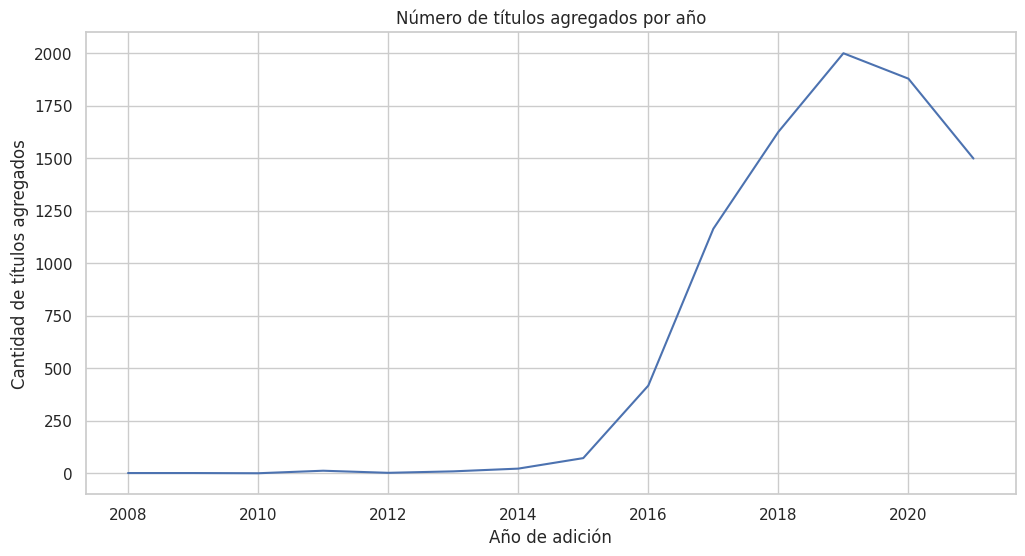

In [10]:

df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
titulosporaño = df['year_added'].value_counts().sort_index().dropna()


plt.figure(figsize=(12, 6))
sns.lineplot(x=titulosporaño.index, y=titulosporaño.values)
plt.xlabel('Año de adición')
plt.ylabel('Cantidad de títulos agregados')
plt.title('Número de títulos agregados por año')
plt.show()

In [11]:
 #En el año en que mas crecio fue en 2019, esto podria relacionarse directamente con la alta cantidad de usuarios que tenia la plataforma

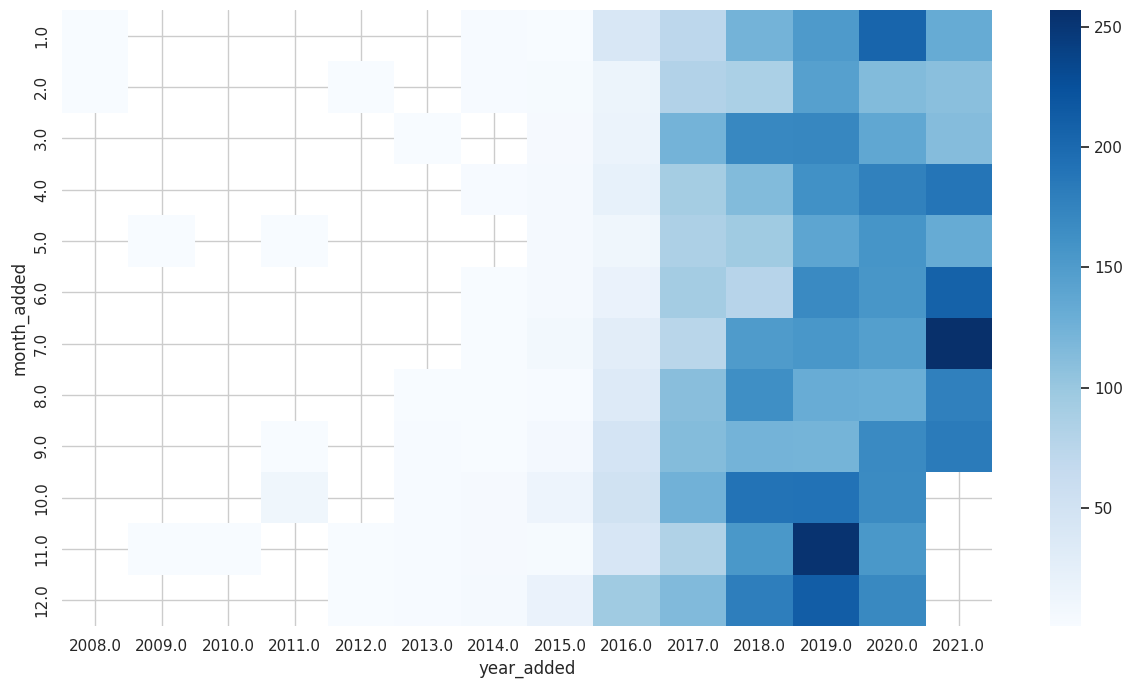

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.groupby(['month_added','year_added']).size().unstack(), cmap='Blues')
plt.show()

In [13]:
#Podria observarse una leve tendencia a que a lo largo de los años hay mas estrenos en diciembre o tirando hacia fines de año

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1759486200.py:2: SyntaxWarning: invalid escape sequence '\d'
  duracion['duration'] = duracion['duration'].str.extract('(\d+)').astype(float)


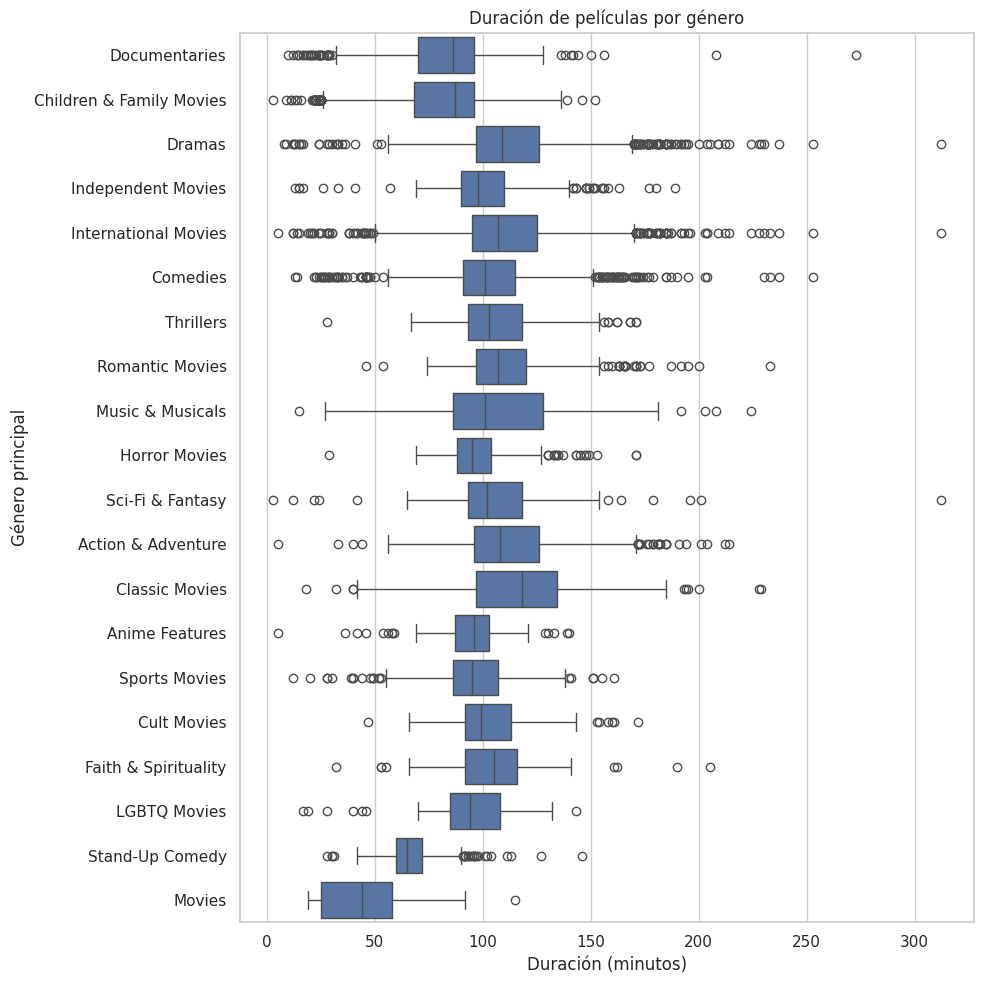

In [14]:
duracion = df[df['type'] == 'Movie'][['duration', 'listed_in']].copy()
duracion['duration'] = duracion['duration'].str.extract('(\d+)').astype(float)
duracion.dropna(subset=['duration'], inplace=True)
duracion['duration'] = duracion['duration'].astype(int)

duracion['listed_in'] = duracion['listed_in'].str.split(', ')
duracion_exploded = duracion.explode('listed_in')

plt.figure(figsize=(10, 10))
sns.boxplot(x='duration', y='listed_in', data=duracion_exploded)
plt.ylabel('Género principal')
plt.xlabel('Duración (minutos)')
plt.title('Duración de películas por género')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
#El promedio mas alto es el de classic movies, tambien puede observarse que los cuartiles estan bastante distanciados en comparacion a otras categorias, mas no es el que presenta mayor variabilidad



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



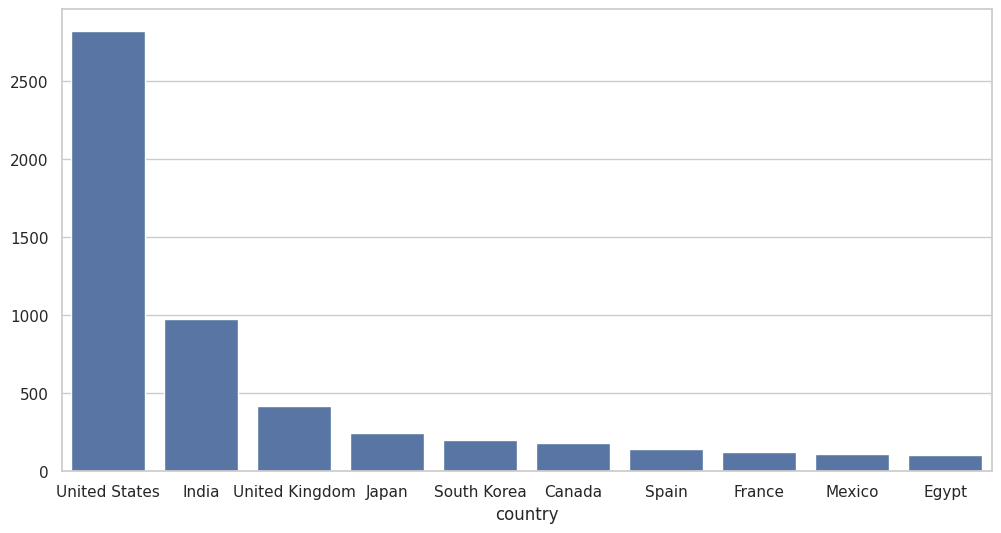

In [16]:
paises = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=paises.index, y=paises.values)
plt.show()

In [17]:
#El pais predominante es Estados Unidos, la verda la distribucion no me sorprende considerando el tamaño de la industria de estados unidos y el crecimiento de la industria india

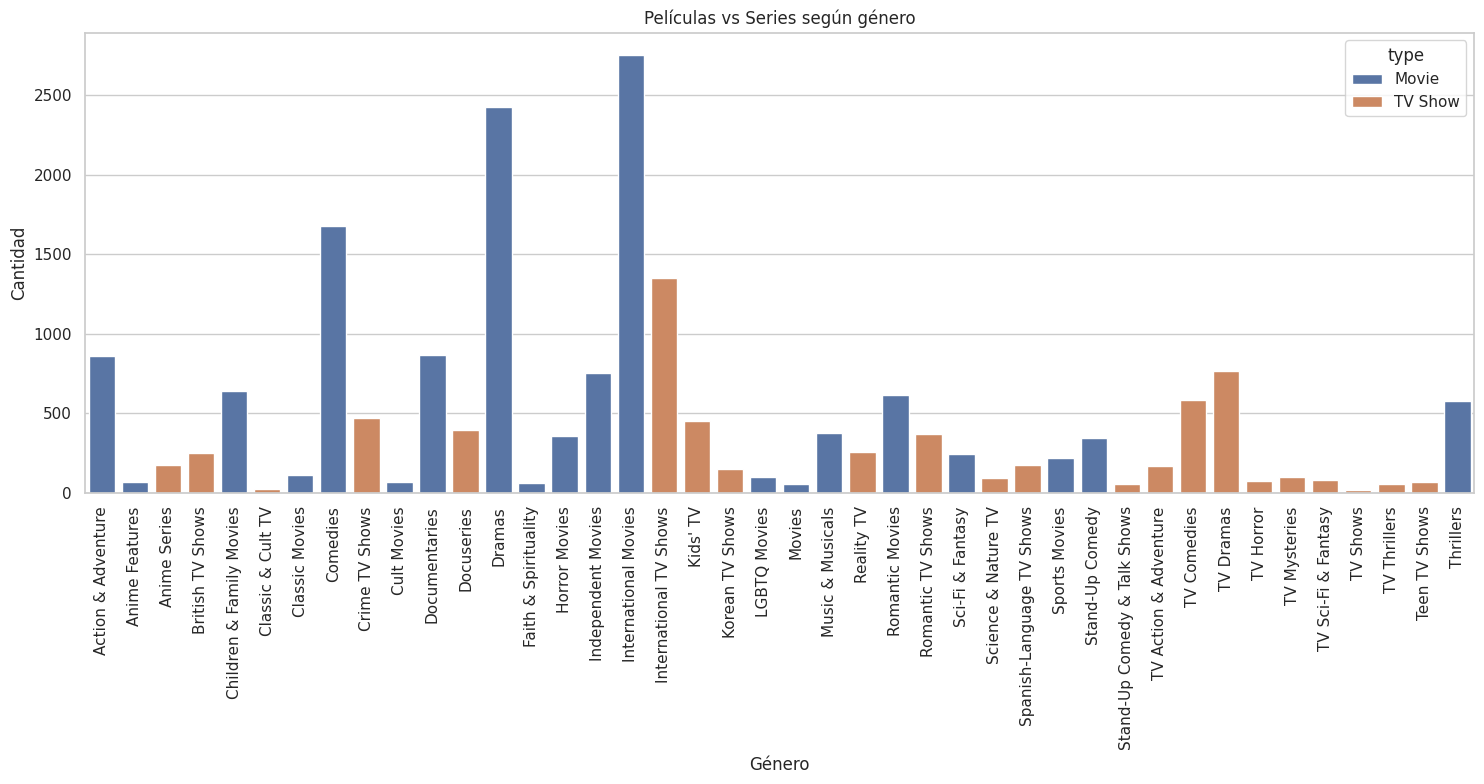

In [26]:
df_generos = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

generosportipo = df_generos.groupby(['listed_in', 'type']).size().reset_index(name='count')

plt.figure(figsize=(15, 8)) # Adjusted figure size
sns.barplot(x='listed_in', y='count', hue='type', data=generosportipo)
plt.ylabel('Cantidad')
plt.title('Películas vs Series según género')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
#No se no logre hacer el grafico como los del profe :(

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1298503768.py:4: SyntaxWarning: invalid escape sequence '\d'
  df_peliculas['duration_minutes'] = df_peliculas['duration'].str.extract('(\d+)').astype(float)


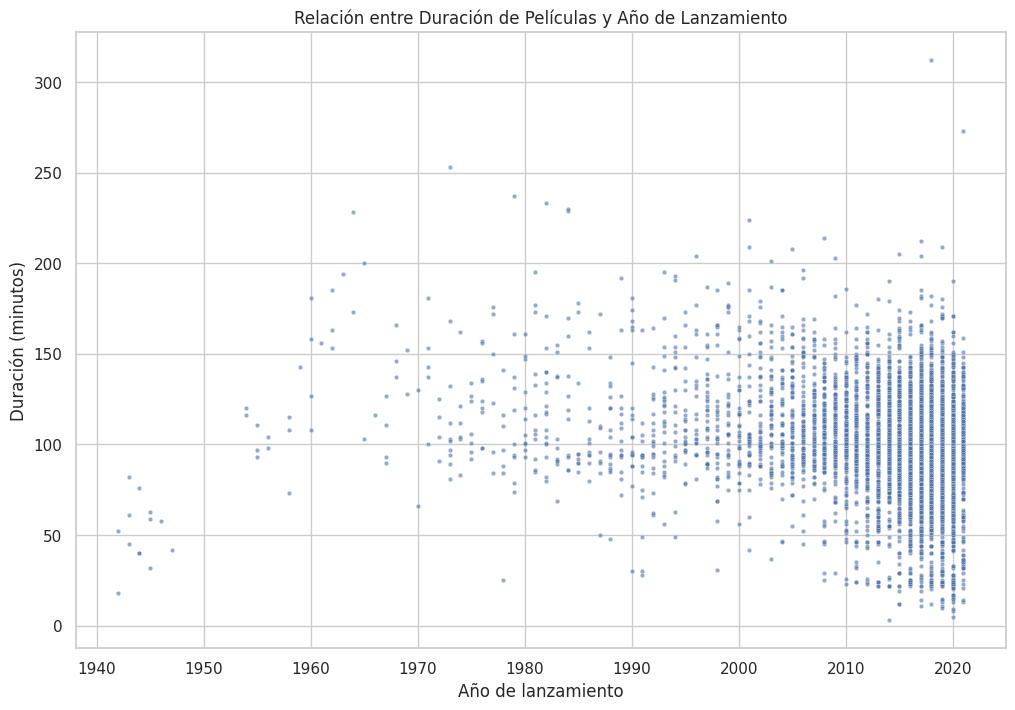

In [21]:
df_peliculas = df[df['type'] == 'Movie'].copy()

df_peliculas['duration_minutes'] = df_peliculas['duration'].str.extract('(\d+)').astype(float)
df_peliculas.dropna(subset=['duration_minutes'], inplace=True) # borra filas que no esten con la duracion en float
df_peliculas['duration_minutes'] = df_peliculas['duration_minutes'].astype(int)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='release_year', y='duration_minutes', data=df_peliculas, s=10, alpha=0.6) #agregamos transparencia a los puntos para que sea mas notoria la acumulacion de puntos
plt.xlabel('Año de lanzamiento')
plt.ylabel('Duración (minutos)')
plt.title('Relación entre Duración de Películas y Año de Lanzamiento')
plt.show()

In [21]:
#pareciera ser que con el tiempo se ha ido haciendo mas contenido de menor duracion pero manteniendo el de larga duracion tambien

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

# FIXME

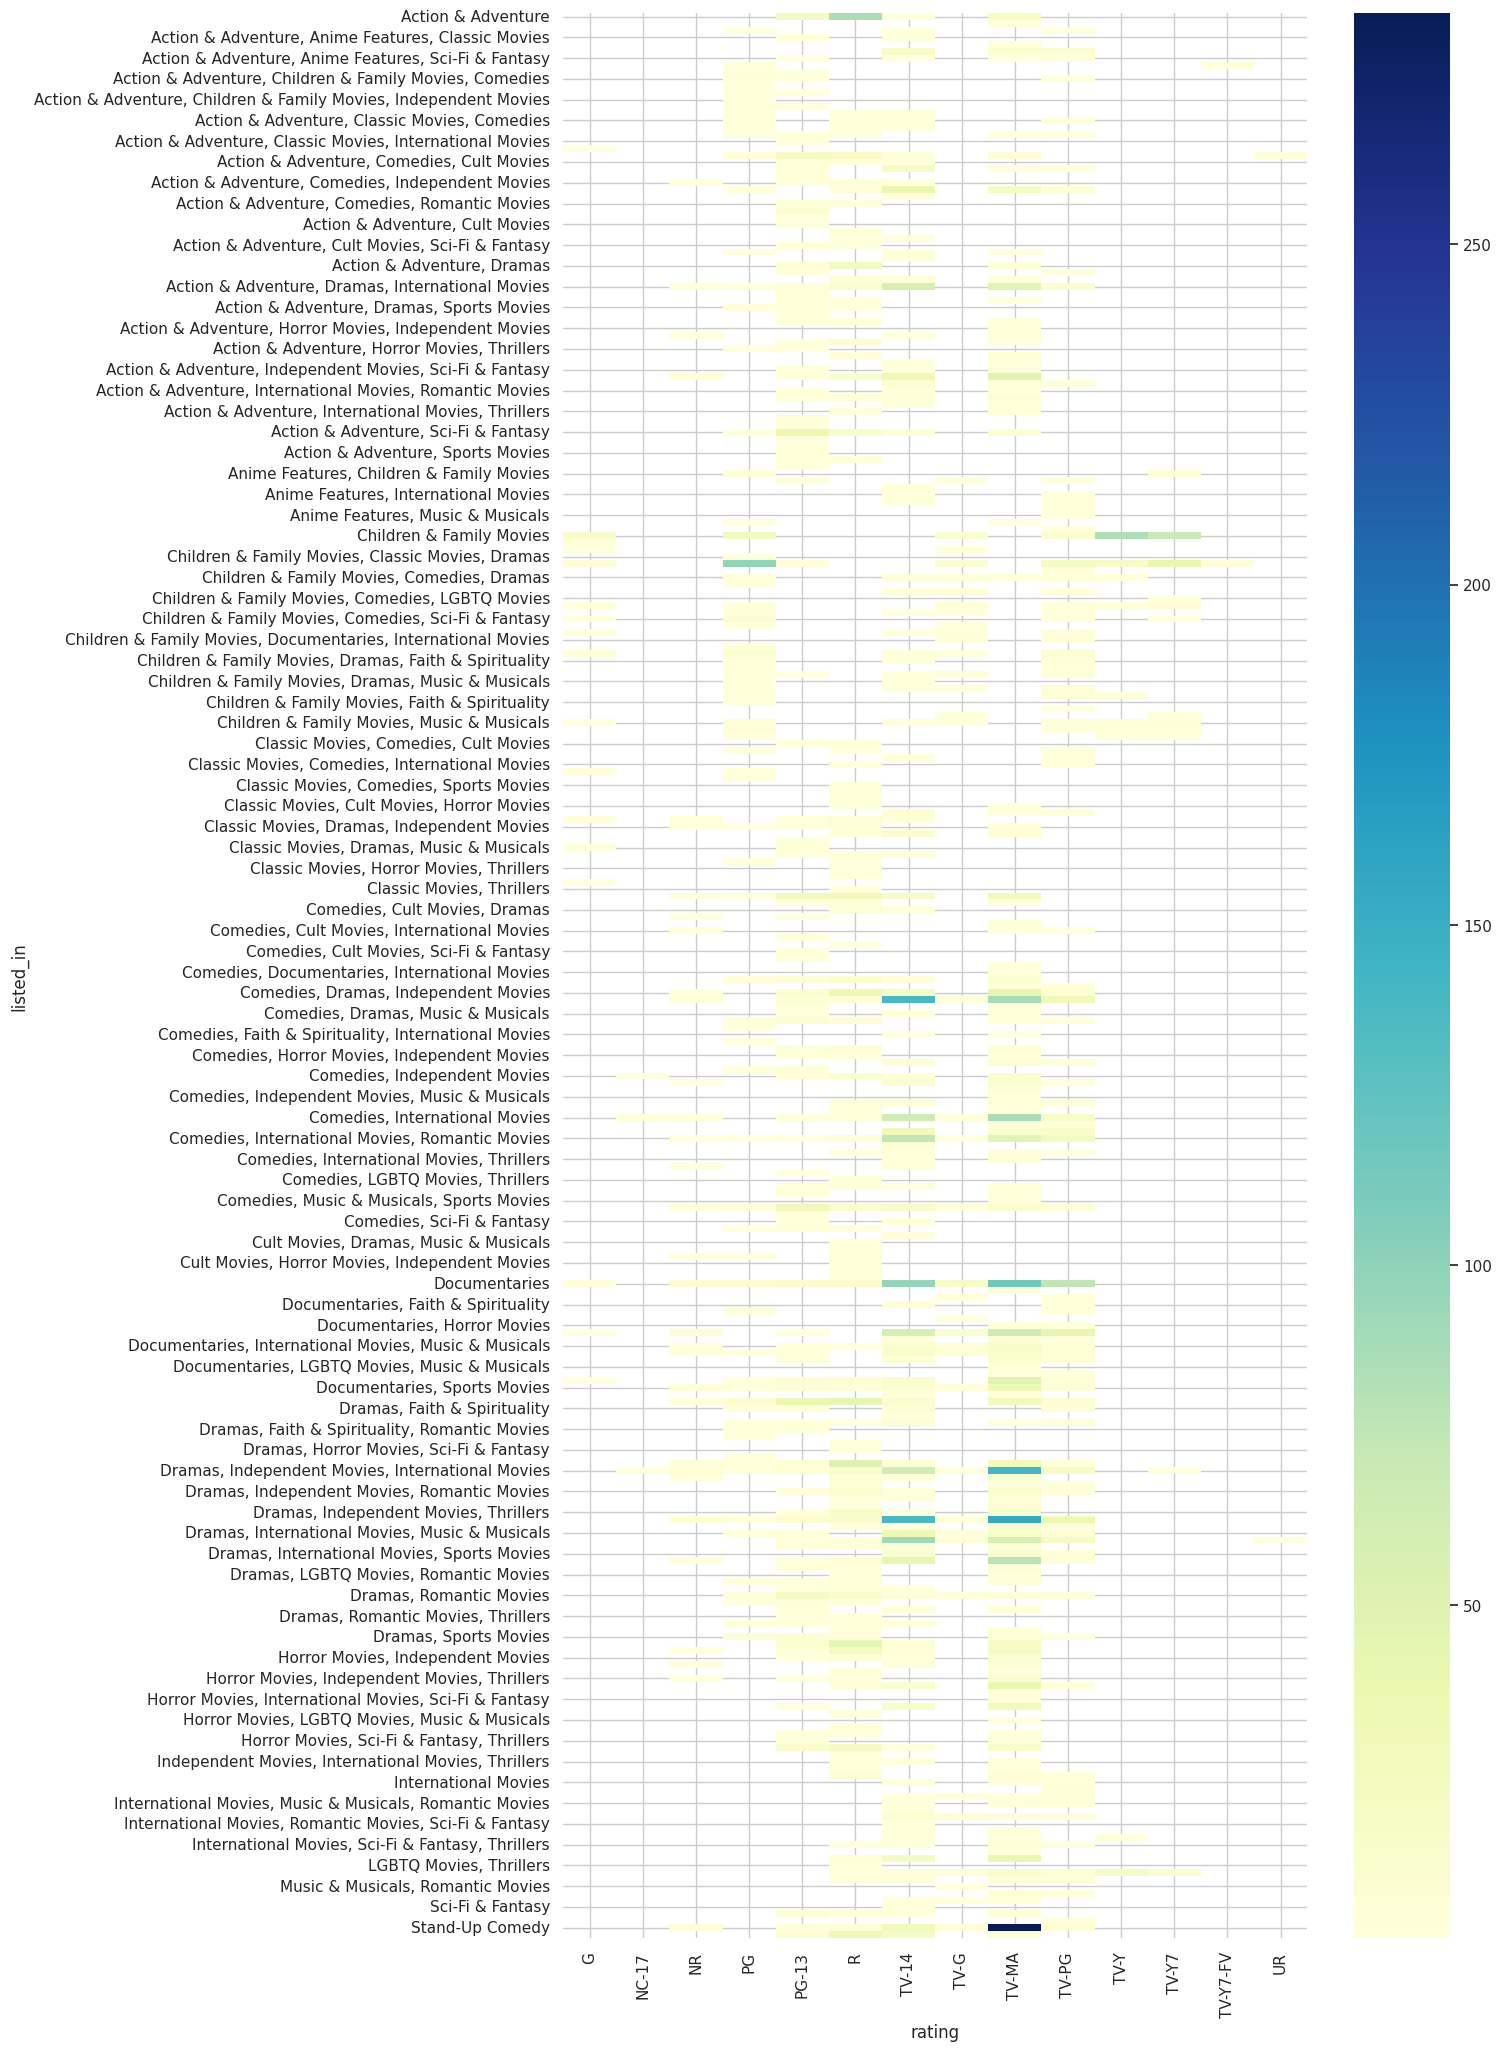

In [22]:
df_aaaaa=df_peliculas.groupby(['listed_in', 'rating']).size().reset_index(name='count')
df_aaaaa
plt.figure(figsize=(12, 25))
sns.heatmap(df_aaaaa.pivot(index='listed_in', columns='rating', values='count'), cmap='YlGnBu')
plt.show()

In [23]:
#vuelvo a repetir que no entiendo que significan las clasificaciones asi que no se :p